In [1]:
# importing modules for the analysis

import pandas as pd
import numpy as np
from scipy import stats 
import os
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.metrics import r2_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import datetime
import random

In [2]:
# reading in relevant csv's for Logistic Regression model

file_cust = pd.read_csv('ecommerce_data/olist_customers_dataset.csv')
#file_geo = pd.read_csv('ecommerce_data/olist_geolocation_dataset.csv')
file_items = pd.read_csv('ecommerce_data/olist_order_items_dataset.csv')
file_payments = pd.read_csv('ecommerce_data/olist_order_payments_dataset.csv')
file_reviews = pd.read_csv('ecommerce_data/olist_order_reviews_dataset.csv')
file_orders = pd.read_csv('ecommerce_data/olist_orders_dataset.csv')
#file_products = pd.read_csv('ecommerce_data/olist_products_dataset.csv')
#file_sellers = pd.read_csv('ecommerce_data/olist_sellers_dataset.csv')
#file_category = pd.read_csv('ecommerce_data/product_category_name_translation.csv')

In [3]:
# Review info in different dataframes

file_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [4]:
# Pulling only necessary columns to reduce records dropped for NAs

file_cust = file_cust[['customer_id','customer_unique_id']]
file_items = file_items[['order_id', 'freight_value']]
file_payments = file_payments[['order_id','payment_installments','payment_value']]
file_reviews = file_reviews[['order_id','review_score','review_creation_date','review_answer_timestamp']]
file_orders = file_orders[['order_id','customer_id','order_purchase_timestamp','order_estimated_delivery_date','order_delivered_customer_date']]

In [5]:
#file_cust = file_cust.dropna()
#file_geo = file_geo.dropna()
#file_items = file_items.dropna()
#file_payments = file_payments.dropna()
#file_reviews = file_reviews.dropna()
#file_orders = file_orders.dropna()
#file_products = file_products.dropna()
#file_sellers = file_sellers.dropna()
#file_category = file_category.dropna()

In [6]:
#Merge process; Re-review info for sanity check

data = pd.merge(file_items,file_orders,on='order_id',how='left')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 6 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   freight_value                  112650 non-null  float64
 2   customer_id                    112650 non-null  object 
 3   order_purchase_timestamp       112650 non-null  object 
 4   order_estimated_delivery_date  112650 non-null  object 
 5   order_delivered_customer_date  110196 non-null  object 
dtypes: float64(1), object(5)
memory usage: 6.0+ MB


In [7]:
data = pd.merge(data,file_payments,on='order_id',how='left')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117604 entries, 0 to 117603
Data columns (total 8 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117604 non-null  object 
 1   freight_value                  117604 non-null  float64
 2   customer_id                    117604 non-null  object 
 3   order_purchase_timestamp       117604 non-null  object 
 4   order_estimated_delivery_date  117604 non-null  object 
 5   order_delivered_customer_date  115037 non-null  object 
 6   payment_installments           117601 non-null  float64
 7   payment_value                  117601 non-null  float64
dtypes: float64(3), object(5)
memory usage: 8.1+ MB


In [8]:
data = pd.merge(data,file_reviews,on='order_id',how='left')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118318 entries, 0 to 118317
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       118318 non-null  object 
 1   freight_value                  118318 non-null  float64
 2   customer_id                    118318 non-null  object 
 3   order_purchase_timestamp       118318 non-null  object 
 4   order_estimated_delivery_date  118318 non-null  object 
 5   order_delivered_customer_date  115730 non-null  object 
 6   payment_installments           118315 non-null  float64
 7   payment_value                  118315 non-null  float64
 8   review_score                   118318 non-null  int64  
 9   review_creation_date           118318 non-null  object 
 10  review_answer_timestamp        118318 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 10.8+ MB


In [9]:
data = pd.merge(data,file_cust,on='customer_id',how='left')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118318 entries, 0 to 118317
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       118318 non-null  object 
 1   freight_value                  118318 non-null  float64
 2   customer_id                    118318 non-null  object 
 3   order_purchase_timestamp       118318 non-null  object 
 4   order_estimated_delivery_date  118318 non-null  object 
 5   order_delivered_customer_date  115730 non-null  object 
 6   payment_installments           118315 non-null  float64
 7   payment_value                  118315 non-null  float64
 8   review_score                   118318 non-null  int64  
 9   review_creation_date           118318 non-null  object 
 10  review_answer_timestamp        118318 non-null  object 
 11  customer_unique_id             118318 non-null  object 
dtypes: float64(3), int64(1), objec

In [10]:
#data = file_orders.merge(file_items, on='order_id',how='left')
#data = data.merge(file_payments, on='order_id',how='outer',validate='m:m')
#data = data.merge(file_reviews, on='order_id',how='outer')
##data = data.merge(file_products,on='product_id',how='outer')
#data = data.merge(file_cust,on='customer_id',how='outer')
##data = data.merge(file_sellers, on='seller_id',how='outer')
##data = data.merge(file_category, on='product_category_name',how='outer')

In [11]:
#data = data.dropna()

In [12]:
data.columns

Index(['order_id', 'freight_value', 'customer_id', 'order_purchase_timestamp',
       'order_estimated_delivery_date', 'order_delivered_customer_date',
       'payment_installments', 'payment_value', 'review_score',
       'review_creation_date', 'review_answer_timestamp',
       'customer_unique_id'],
      dtype='object')

In [13]:
# Check DF length

data

,order_id,freight_value,customer_id,order_purchase_timestamp,order_estimated_delivery_date,order_delivered_customer_date,payment_installments,payment_value,review_score,review_creation_date,review_answer_timestamp,customer_unique_id
0,00010242fe8c5a6d1ba2dd792cb16214,13.29,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,2017-09-29 00:00:00,2017-09-20 23:43:48,2.0,72.19,5,2017-09-21 00:00:00,2017-09-22 10:57:03,871766c5855e863f6eccc05f988b23cb
1,00018f77f2f0320c557190d7a144bdd3,19.93,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 10:53:06,2017-05-15 00:00:00,2017-05-12 16:04:24,3.0,259.83,4,2017-05-13 00:00:00,2017-05-15 11:34:13,eb28e67c4c0b83846050ddfb8a35d051
2,000229ec398224ef6ca0657da4fc703e,17.87,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:33:31,2018-02-05 00:00:00,2018-01-22 13:19:16,5.0,216.87,5,2018-01-23 00:00:00,2018-01-23 16:06:31,3818d81c6709e39d06b2738a8d3a2474
3,00024acbcdf0a6daa1e931b038114c75,12.79,d4eb9395c8c0431ee92fce09860c5a06,2018-08-08 10:00:35,2018-08-20 00:00:00,2018-08-14 13:32:39,2.0,25.78,4,2018-08-15 00:00:00,2018-08-15 16:39:01,af861d436cfc08b2c2ddefd0ba074622
4,00042b26cf59d7ce69dfabb4e55b4fd9,18.14,58dbd0b2d70206bf40e62cd34e84d795,2017-02-04 13:57:51,2017-03-17 00:00:00,2017-03-01 16:42:31,3.0,218.04,5,2017-03-02 00:00:00,2017-03-03 10:54:59,64b576fb70d441e8f1b2d7d446e483c5
...,...,...,...,...,...,...,...,...,...,...,...,...
118313,fffc94f6ce00a00581880bf54a75a037,43.41,b51593916b4b8e0d6f66f2ae24f2673d,2018-04-23 13:57:06,2018-05-18 00:00:00,2018-05-10 22:56:40,1.0,343.40,5,2018-05-11 00:00:00,2018-05-14 12:53:47,0c9aeda10a71f369396d0c04dce13a64
118314,fffcd46ef2263f404302a634eb57f7eb,36.53,84c5d4fbaf120aae381fad077416eaa0,2018-07-14 10:26:46,2018-08-01 00:00:00,2018-07-23 20:31:55,1.0,386.53,5,2018-07-24 00:00:00,2018-07-25 09:25:29,0da9fe112eae0c74d3ba1fe16de0988b
118315,fffce4705a9662cd70adb13d4a31832d,16.95,29309aa813182aaddc9b259e31b870e6,2017-10-23 17:07:56,2017-11-10 00:00:00,2017-10-28 12:22:22,3.0,116.85,5,2017-10-29 00:00:00,2017-10-29 21:33:52,cd79b407828f02fdbba457111c38e4c4
118316,fffe18544ffabc95dfada21779c9644f,8.72,b5e6afd5a41800fdf401e0272ca74655,2017-08-14 23:02:59,2017-08-25 00:00:00,2017-08-16 21:59:40,3.0,64.71,5,2017-08-17 00:00:00,2017-08-18 12:24:05,eb803377c9315b564bdedad672039306


In [14]:
# Check DF length after NA drop

data = data.dropna()
data

,order_id,freight_value,customer_id,order_purchase_timestamp,order_estimated_delivery_date,order_delivered_customer_date,payment_installments,payment_value,review_score,review_creation_date,review_answer_timestamp,customer_unique_id
0,00010242fe8c5a6d1ba2dd792cb16214,13.29,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,2017-09-29 00:00:00,2017-09-20 23:43:48,2.0,72.19,5,2017-09-21 00:00:00,2017-09-22 10:57:03,871766c5855e863f6eccc05f988b23cb
1,00018f77f2f0320c557190d7a144bdd3,19.93,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 10:53:06,2017-05-15 00:00:00,2017-05-12 16:04:24,3.0,259.83,4,2017-05-13 00:00:00,2017-05-15 11:34:13,eb28e67c4c0b83846050ddfb8a35d051
2,000229ec398224ef6ca0657da4fc703e,17.87,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:33:31,2018-02-05 00:00:00,2018-01-22 13:19:16,5.0,216.87,5,2018-01-23 00:00:00,2018-01-23 16:06:31,3818d81c6709e39d06b2738a8d3a2474
3,00024acbcdf0a6daa1e931b038114c75,12.79,d4eb9395c8c0431ee92fce09860c5a06,2018-08-08 10:00:35,2018-08-20 00:00:00,2018-08-14 13:32:39,2.0,25.78,4,2018-08-15 00:00:00,2018-08-15 16:39:01,af861d436cfc08b2c2ddefd0ba074622
4,00042b26cf59d7ce69dfabb4e55b4fd9,18.14,58dbd0b2d70206bf40e62cd34e84d795,2017-02-04 13:57:51,2017-03-17 00:00:00,2017-03-01 16:42:31,3.0,218.04,5,2017-03-02 00:00:00,2017-03-03 10:54:59,64b576fb70d441e8f1b2d7d446e483c5
...,...,...,...,...,...,...,...,...,...,...,...,...
118313,fffc94f6ce00a00581880bf54a75a037,43.41,b51593916b4b8e0d6f66f2ae24f2673d,2018-04-23 13:57:06,2018-05-18 00:00:00,2018-05-10 22:56:40,1.0,343.40,5,2018-05-11 00:00:00,2018-05-14 12:53:47,0c9aeda10a71f369396d0c04dce13a64
118314,fffcd46ef2263f404302a634eb57f7eb,36.53,84c5d4fbaf120aae381fad077416eaa0,2018-07-14 10:26:46,2018-08-01 00:00:00,2018-07-23 20:31:55,1.0,386.53,5,2018-07-24 00:00:00,2018-07-25 09:25:29,0da9fe112eae0c74d3ba1fe16de0988b
118315,fffce4705a9662cd70adb13d4a31832d,16.95,29309aa813182aaddc9b259e31b870e6,2017-10-23 17:07:56,2017-11-10 00:00:00,2017-10-28 12:22:22,3.0,116.85,5,2017-10-29 00:00:00,2017-10-29 21:33:52,cd79b407828f02fdbba457111c38e4c4
118316,fffe18544ffabc95dfada21779c9644f,8.72,b5e6afd5a41800fdf401e0272ca74655,2017-08-14 23:02:59,2017-08-25 00:00:00,2017-08-16 21:59:40,3.0,64.71,5,2017-08-17 00:00:00,2017-08-18 12:24:05,eb803377c9315b564bdedad672039306


In [15]:
#Finding # of unique customers

data['customer_unique_id'].nunique()

93355

In [16]:
data.columns

Index(['order_id', 'freight_value', 'customer_id', 'order_purchase_timestamp',
       'order_estimated_delivery_date', 'order_delivered_customer_date',
       'payment_installments', 'payment_value', 'review_score',
       'review_creation_date', 'review_answer_timestamp',
       'customer_unique_id'],
      dtype='object')

In [17]:
# Convert datetime columns

#data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])
#data['order_approved_at'] = pd.to_datetime(data['order_approved_at'])
#data['order_delivered_carrier_date'] = pd.to_datetime(data['order_delivered_carrier_date'])
data['order_delivered_customer_date'] = pd.to_datetime(data['order_delivered_customer_date'])
data['order_estimated_delivery_date'] = pd.to_datetime(data['order_estimated_delivery_date'])
#data['shipping_limit_date'] = pd.to_datetime(data['shipping_limit_date'])
data['review_creation_date'] = pd.to_datetime(data['review_creation_date'])
data['review_answer_timestamp'] = pd.to_datetime(data['review_answer_timestamp'])

/Users/levisebahar/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/levisebahar/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/levisebahar/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [18]:
#order_dates, order_times = zip(*[(d.date(), d.time()) for d in data['order_purchase_timestamp']])
#data = data.assign(order_date=order_dates, order_time=order_times)

In [19]:
# Drop duplicates to have just one order per customer

unique_orders = data.drop_duplicates(subset='order_id')
unique_orders

,order_id,freight_value,customer_id,order_purchase_timestamp,order_estimated_delivery_date,order_delivered_customer_date,payment_installments,payment_value,review_score,review_creation_date,review_answer_timestamp,customer_unique_id
0,00010242fe8c5a6d1ba2dd792cb16214,13.29,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,2017-09-29,2017-09-20 23:43:48,2.0,72.19,5,2017-09-21,2017-09-22 10:57:03,871766c5855e863f6eccc05f988b23cb
1,00018f77f2f0320c557190d7a144bdd3,19.93,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 10:53:06,2017-05-15,2017-05-12 16:04:24,3.0,259.83,4,2017-05-13,2017-05-15 11:34:13,eb28e67c4c0b83846050ddfb8a35d051
2,000229ec398224ef6ca0657da4fc703e,17.87,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:33:31,2018-02-05,2018-01-22 13:19:16,5.0,216.87,5,2018-01-23,2018-01-23 16:06:31,3818d81c6709e39d06b2738a8d3a2474
3,00024acbcdf0a6daa1e931b038114c75,12.79,d4eb9395c8c0431ee92fce09860c5a06,2018-08-08 10:00:35,2018-08-20,2018-08-14 13:32:39,2.0,25.78,4,2018-08-15,2018-08-15 16:39:01,af861d436cfc08b2c2ddefd0ba074622
4,00042b26cf59d7ce69dfabb4e55b4fd9,18.14,58dbd0b2d70206bf40e62cd34e84d795,2017-02-04 13:57:51,2017-03-17,2017-03-01 16:42:31,3.0,218.04,5,2017-03-02,2017-03-03 10:54:59,64b576fb70d441e8f1b2d7d446e483c5
...,...,...,...,...,...,...,...,...,...,...,...,...
118313,fffc94f6ce00a00581880bf54a75a037,43.41,b51593916b4b8e0d6f66f2ae24f2673d,2018-04-23 13:57:06,2018-05-18,2018-05-10 22:56:40,1.0,343.40,5,2018-05-11,2018-05-14 12:53:47,0c9aeda10a71f369396d0c04dce13a64
118314,fffcd46ef2263f404302a634eb57f7eb,36.53,84c5d4fbaf120aae381fad077416eaa0,2018-07-14 10:26:46,2018-08-01,2018-07-23 20:31:55,1.0,386.53,5,2018-07-24,2018-07-25 09:25:29,0da9fe112eae0c74d3ba1fe16de0988b
118315,fffce4705a9662cd70adb13d4a31832d,16.95,29309aa813182aaddc9b259e31b870e6,2017-10-23 17:07:56,2017-11-10,2017-10-28 12:22:22,3.0,116.85,5,2017-10-29,2017-10-29 21:33:52,cd79b407828f02fdbba457111c38e4c4
118316,fffe18544ffabc95dfada21779c9644f,8.72,b5e6afd5a41800fdf401e0272ca74655,2017-08-14 23:02:59,2017-08-25,2017-08-16 21:59:40,3.0,64.71,5,2017-08-17,2017-08-18 12:24:05,eb803377c9315b564bdedad672039306


In [20]:
# validate # of unique customers

data['customer_unique_id'].nunique()

93355

In [21]:
# Process to split repeat vs non-repeat customers

df = unique_orders['customer_unique_id'].value_counts().rename_axis('unique_values').reset_index(name='counts')

In [22]:
df

,unique_values,counts
0,8d50f5eadf50201ccdcedfb9e2ac8455,15
1,3e43e6105506432c953e165fb2acf44c,9
2,ca77025e7201e3b30c44b472ff346268,7
3,6469f99c1f9dfae7733b25662e7f1782,7
4,1b6c7548a2a1f9037c1fd3ddfed95f33,7
...,...,...
93350,ac5a446b6eb92f59a152ae107604868f,1
93351,954ae4c58d699117aebf7e32399213da,1
93352,0329fc1a5c3519ff9d894a49698269e6,1
93353,6a834ffa571a333c7e753a72967c3456,1


In [23]:
df1 = df.loc[df['counts'] > 1]

In [24]:
df1['counts'].sum()

5921

In [25]:
repeat_list = df1['unique_values'].tolist()

In [26]:
len(repeat_list)

2801

In [27]:
len(data['customer_unique_id'].unique())

93355

In [28]:
data["repeat?"] = np.where(data["customer_unique_id"].isin(repeat_list), 1, 0)

/Users/levisebahar/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
data['repeat?'].value_counts()

0    107508
1      8219
Name: repeat?, dtype: int64

In [30]:
data.columns

Index(['order_id', 'freight_value', 'customer_id', 'order_purchase_timestamp',
       'order_estimated_delivery_date', 'order_delivered_customer_date',
       'payment_installments', 'payment_value', 'review_score',
       'review_creation_date', 'review_answer_timestamp', 'customer_unique_id',
       'repeat?'],
      dtype='object')

In [31]:
data['delivery_time b/(w)'] = data['order_estimated_delivery_date'] - data['order_delivered_customer_date']
data['delivery_days b/(w)'] = data['delivery_time b/(w)'].apply(lambda x: x.days)

/Users/levisebahar/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/levisebahar/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
def is_late_func(x):
    if x>-1:
        return 1
    if x<0:
        return 0
    
data['late'] = data['delivery_days b/(w)'].apply(is_late_func)

/Users/levisebahar/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [33]:
data['review_answer_time'] = data['review_answer_timestamp'] - data['review_creation_date']
data['review_response_days'] = data['review_answer_time'].apply(lambda x: x.days)

/Users/levisebahar/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/levisebahar/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
data['freight_percent'] = data['freight_value'] / data['payment_value']

/Users/levisebahar/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
first_order_df = data.sort_values(by='order_purchase_timestamp')
first_order_df = first_order_df.loc[first_order_df['order_purchase_timestamp']!=0]
first_order_df.drop_duplicates(subset ="customer_unique_id",keep = 'first', inplace = True)
#first_order_df.drop_duplicates(subset ="customer_id",keep = 'first', inplace = True)

In [36]:
first_order_df['repeat?'].value_counts()

0    90554
1     2801
Name: repeat?, dtype: int64

In [37]:
df_clean = first_order_df[['freight_value','payment_installments','payment_value','review_score','delivery_days b/(w)','review_response_days','freight_percent','late','repeat?']].copy()

In [38]:
df_clean = df_clean.dropna()
df_clean

,freight_value,payment_installments,payment_value,review_score,delivery_days b/(w),review_response_days,freight_percent,late,repeat?
27490,15.56,1.0,45.46,4,0,4,0.342279,1,1
88040,17.19,1.0,39.09,4,10,1,0.439754,1,0
47178,14.11,1.0,35.61,1,16,0,0.396237,1,0
75655,17.24,1.0,53.73,3,25,0,0.320864,1,0
97271,13.56,6.0,133.46,1,22,1,0.101603,1,0
...,...,...,...,...,...,...,...,...,...
38106,9.20,7.0,73.10,1,3,21,0.125855,1,0
5120,46.48,8.0,510.96,5,4,54,0.090966,1,0
10292,15.39,1.0,61.29,5,11,2,0.251101,1,0
1779,8.33,1.0,33.23,3,3,0,0.250677,1,0


In [39]:
print(df_clean.dtypes)

freight_value           float64
payment_installments    float64
payment_value           float64
review_score              int64
delivery_days b/(w)       int64
review_response_days      int64
freight_percent         float64
late                      int64
repeat?                   int64
dtype: object


In [40]:
df_clean['payment_installments'] = df_clean['payment_installments'].astype('int')
df_clean['review_score'] = df_clean['review_score'].astype('int')
df_clean['delivery_days b/(w)'] = df_clean['delivery_days b/(w)'].astype('int')
df_clean['review_response_days'] = df_clean['review_response_days'].astype('int')
df_clean['late'] = df_clean['late'].astype('int')

In [41]:
print(df_clean.dtypes)

freight_value           float64
payment_installments      int64
payment_value           float64
review_score              int64
delivery_days b/(w)       int64
review_response_days      int64
freight_percent         float64
late                      int64
repeat?                   int64
dtype: object


In [42]:
repeat_df = df_clean.loc[df_clean['repeat?'] == 1]

In [43]:
repeat_df

,freight_value,payment_installments,payment_value,review_score,delivery_days b/(w),review_response_days,freight_percent,late,repeat?
27490,15.56,1,45.46,4,0,4,0.342279,1,1
44614,14.03,2,263.93,5,23,3,0.053158,1,1
22872,11.30,1,60.70,5,40,214,0.186161,1,1
46801,14.73,3,69.63,5,28,1,0.211547,1,1
17528,28.97,5,126.12,1,12,31,0.229702,1,1
...,...,...,...,...,...,...,...,...,...
110511,23.06,1,60.25,4,6,0,0.382739,1,1
58953,14.19,1,140.68,5,1,1,0.100867,1,1
75447,50.89,8,232.59,5,5,2,0.218797,1,1
59877,13.20,4,90.20,1,29,0,0.146341,1,1


In [44]:
repeats = len(repeat_df)
repeats

2801

In [45]:
non_repeat_df = df_clean.loc[df_clean['repeat?'] == 0]

In [46]:
non_repeat_df = non_repeat_df.iloc[:repeats]
non_repeat_df

,freight_value,payment_installments,payment_value,review_score,delivery_days b/(w),review_response_days,freight_percent,late,repeat?
88040,17.19,1,39.09,4,10,1,0.439754,1,0
47178,14.11,1,35.61,1,16,0,0.396237,1,0
75655,17.24,1,53.73,3,25,0,0.320864,1,0
97271,13.56,6,133.46,1,22,1,0.101603,1,0
94923,10.96,4,40.95,5,39,3,0.267643,1,0
...,...,...,...,...,...,...,...,...,...
35349,10.53,2,43.04,4,9,4,0.244656,1,0
69933,16.89,1,82.86,5,18,1,0.203838,1,0
101692,14.52,1,5.52,5,0,0,2.630435,1,0
791,12.99,10,352.98,4,12,0,0.036801,1,0


In [47]:
even_df = pd.concat([repeat_df,non_repeat_df])

In [48]:
even_df

,freight_value,payment_installments,payment_value,review_score,delivery_days b/(w),review_response_days,freight_percent,late,repeat?
27490,15.56,1,45.46,4,0,4,0.342279,1,1
44614,14.03,2,263.93,5,23,3,0.053158,1,1
22872,11.30,1,60.70,5,40,214,0.186161,1,1
46801,14.73,3,69.63,5,28,1,0.211547,1,1
17528,28.97,5,126.12,1,12,31,0.229702,1,1
...,...,...,...,...,...,...,...,...,...
35349,10.53,2,43.04,4,9,4,0.244656,1,0
69933,16.89,1,82.86,5,18,1,0.203838,1,0
101692,14.52,1,5.52,5,0,0,2.630435,1,0
791,12.99,10,352.98,4,12,0,0.036801,1,0


In [49]:
#df_clean = df_clean.dropna()

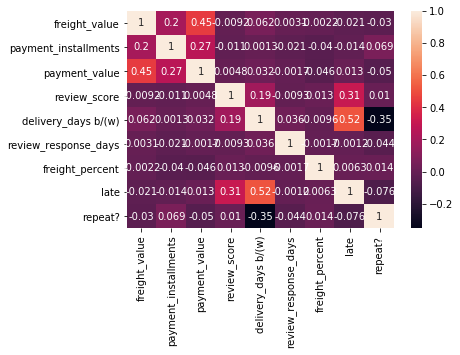

In [50]:
corrMatrix = even_df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [51]:
corr_df = even_df.corr()

In [52]:
sorted_corr_df = corr_df.sort_values(by='repeat?',ascending=False)

In [53]:
sorted_corr_df

,freight_value,payment_installments,payment_value,review_score,delivery_days b/(w),review_response_days,freight_percent,late,repeat?
repeat?,-0.030198,0.068957,-0.049593,0.010262,-0.353819,-0.044081,0.013848,-0.075801,1.000000
payment_installments,0.204478,1.000000,0.267654,-0.011058,0.001341,-0.021249,-0.040243,-0.014338,0.068957
freight_percent,-0.002158,-0.040243,-0.045624,0.013230,-0.009624,-0.001662,1.000000,0.006271,0.013848
review_score,-0.009203,-0.011058,0.004777,1.000000,0.187651,-0.009297,0.013230,0.309290,0.010262
freight_value,1.000000,0.204478,0.445199,-0.009203,0.061803,0.003123,-0.002158,-0.020750,-0.030198
review_response_days,0.003123,-0.021249,-0.001705,-0.009297,0.035961,1.000000,-0.001662,-0.001206,-0.044081
payment_value,0.445199,0.267654,1.000000,0.004777,0.031920,-0.001705,-0.045624,0.012658,-0.049593
late,-0.020750,-0.014338,0.012658,0.309290,0.515049,-0.001206,0.006271,1.000000,-0.075801
delivery_days b/(w),0.061803,0.001341,0.031920,0.187651,1.000000,0.035961,-0.009624,0.515049,-0.353819


In [54]:
df_clean = df_clean.dropna()

In [55]:
X = even_df[['review_response_days','delivery_days b/(w)','late','review_score']].values
y = even_df['repeat?'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
logisticModel = LogisticRegression()
#training data with logistic regression model
logisticModel.fit(X_train,y_train)

#X_test = df_clean[['review_response_days','delivery_days b/(w)','late','review_score']].values
#y_test = df_clean['repeat?'].values
#predicting with models
predicts = logisticModel.predict(X_test)
print(predicts)

[1 1 1 ... 1 0 1]


In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicts))
print("Accuracy:", accuracy_score(y_test, predicts))

              precision    recall  f1-score   support

           0       0.69      0.64      0.66       535
           1       0.69      0.74      0.71       586

    accuracy                           0.69      1121
   macro avg       0.69      0.69      0.69      1121
weighted avg       0.69      0.69      0.69      1121

Accuracy: 0.6895628902765388
